In [1]:
#import libraries
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.1f' % x)
import matplotlib.pyplot as plt
import numpy as np
from docx import Document
import os,sys

In [2]:
#read the created df for this script
cases_population=pd.read_csv('cases_population.csv')

In [3]:
#list options
options=list(cases_population['location'])

In [4]:
print ('List of availiable input options')
print("\n")
print(options)
print("\n")
#input
country = input('Enter your country:')
print("\n")
print("Done! Your report is created in your folder named : {}_report.docx".format(country))

List of availiable input options


['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Faeroe Islands', 'Falkland Islands', 'Fiji', 'Finland', 'France', 'French Polyn

Enter your country: Greece




Done! Your report is created in your folder named : Greece_report.docx


In [5]:
#filter selected country
selection = cases_population.loc[cases_population['location'] == country]

In [7]:
# Specify the values of blue bars (height)
blue_bar = (selection['total_cases'])
# Specify the values of orange bars (height)
orange_bar = (selection['population'])
#get the string of the country
country=list(selection['location'])
country=country[0]
#get the string of the total_cases
total_cases=list(selection['total_cases'])
total_cases=total_cases[0]
#get the string of the population
population=list(selection['population'])
population=population[0]

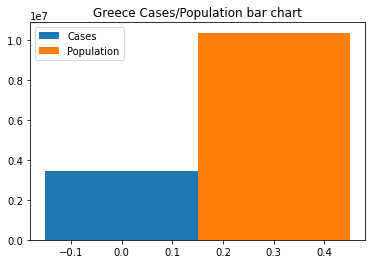

In [8]:
#matplotlib bar chart

#figsize
plt.figure(figsize=[6,4])
#no of graphs
N = 1
# Width of a bar 
width = 0.3       
ind = np.arange(N)
# Plotting
plt.bar(ind, blue_bar , width, label='Cases')
plt.bar(ind + width, orange_bar, width, label='Population')
plt.title('{} Cases/Population bar chart'.format(country))
plt.legend(loc='best')
#save graph
plt.savefig('graph.png')

In [17]:
#creating the word document


document = Document()
#add header
document.add_heading('{} cases/population'.format(country), level=0)
#add table
table = document.add_table(rows=2, cols=3)
#fill cells
table.cell(0, 0).text='LOCATION'
table.cell(0, 1).text='TOTAL CASES'
table.cell(0, 2).text='POPULATION'
table.cell(1, 0).text=str(country)
table.cell(1, 1).text=str(total_cases)
table.cell(1, 2).text=str(population)
#add the saved graph
document.add_picture('graph.png')
#save the word document
document.save('{}_report.docx'.format(country))

In [44]:
#delete the saved graph

folder_path = os.getcwd()
test = os.listdir(folder_path)
for images in test:
    if images.endswith(".png"):
        os.remove(os.path.join(folder_path, images))